# Taller Regresión Lineal

## Funciones básicas

En primer lugar, importamos las librerías que necesitaremos

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #Algoritmo de regresión lineal
from sklearn.model_selection import train_test_split #para partir el conjunto de datos en Entrenamiento y Testeo
import matplotlib.pyplot as plt #para gráficas


Cargamos un conjunto de datos. Entrenaremos modelos de regresión lineal para un conjunto de datos sobre peces. Se desearía predecir el peso de un pez, a partir de algunas de sus medidas. Longitud vertical, diagonal, etc. Nuestra variable a predecir será el peso *Weight*.
Detalles sobre el conjunto de datos [Aquí](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

Si está trabajando en colab, oprima el ícono de folder en la izquierda y luego el ícono de *subir.* Cargue un archivo de valrores separados por comas (.csv). A continuación usamos la función de pandas *read_csv*. Ingresamos como parámetro la ruta de ubicación del archivo. Si ya se ha subido el archivo, se puede desplegar el menú sobre dicho archivo y usar *copiar ruta*.

In [7]:
# Leer archivo. Ingresar la ruta del archivo
df=pd.read_csv("Fish (2).csv")

# Mostrar las primeras 10 líneas del dataset
df.head(10)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


Procedemos a graficar puntos con coordenadas x=Length1, y=Weight para observar si aparentan tener un comportamiento cercano al lineal.

Para más detalles sobre diagramas de dispersión ver [AQUÍ](https://www.w3schools.com/python/matplotlib_scatter.asp).

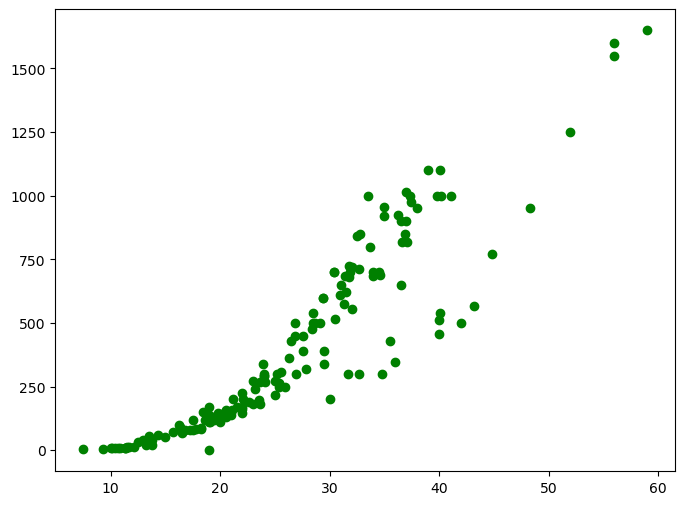

In [8]:
#Graficar diagrama de dispersión para Length1 vs Weight
plt.figure(figsize = [8, 6]) #Establecemos el tamaño de la figura
plt.scatter(data=df, x='Length1', y='Weight', color= "green") #Asignamos la variable x, y y el color para el diagrama de dispersión.


Usaremos el algoritmo para regresión lineal de SciKit Learn. Éste recibe como datos de entrada (X) un arreglo de dos dimensones. Pero aquí tenemos un vector para cada atributo. Queremos entonces una matriz de tamaño (lo que corresponda) x 1. Ése es el significado que tiene el valor -1 en arreglos de Numpy. Siguiendo esta idea, redimensionaremos los datos de entrada X.

In [11]:
df['Length1']

0      23.2
1      24.0
2      23.9
3      26.3
4      26.5
       ... 
154    11.5
155    11.7
156    12.1
157    13.2
158    13.8
Name: Length1, Length: 159, dtype: float64

In [23]:
X = np.array(df['Length1']).reshape(-1, 1) # debemos poner nuestros atributos X en gforma de arreglo
y = df['Weight']


Ahora usamos la función train_test_split para partir el conjunto de datos en dos subconjuntos: entrenamiento y testeo. Para ver ejemplos del uso de esta función ver [AQUÍ](https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/).

Usar sólo los parámetros X,y, test_size (Porcentaje de los datos correspondiente al conjunto de testeo). Se suelen usar proporciones al rededor de Entrenamiento 80% y Testeo 20%.

In [15]:
# Partir el conjunto de datos en Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Ahora definamos el modelo de regresión lineal. Nuestro modelo se llamará *regr*. Lo entrenaremos y mediremos su coeficiente de detrminación.

In [18]:
# Modelo de regresión lineal de SciKit Learn

#Importar métricas          # métrica para minimizar el error de los teta1,teta2
from sklearn.metrics import mean_squared_error, r2_score # métrica para  saber que tan bueno fue el modelo 

#Se define el algoritmo a usar para entrenar el modelo
regr = LinearRegression()
#se entrena el modelo con el dataset y etiqueta de entrenamiento
regr.fit(X_train, y_train)
#se calculan predicciones para el conjunto de test.
y_pred = regr.predict(X_test)

print("score = ", r2_score(y_test, y_pred)) #y_test cumple la función de ser mis datos verdaderos, coin el R2 quiero medir que tan 
                                            # alejados estan unos entre otros
print("MSE = ",mean_squared_error(y_test, y_pred))
# Recordemos que el MSE mide el promedio de la diferencia entre los datos y la recta que crea el modelo
# Siempre me interesa que este error sea pequeño, pero deboi tener en cuenta que esta siempre en la escala de la variable y
# Por  lo que se puede interpretar
# el score si es una medida directa de verificar la eficiencia del modelo


score =  0.8329439821422984
MSE =  15795.968717283578


La salida anterior es el coeficiente de determinación del modelo arrojado por el algoritmo, así como el error cuadrático medio.


A continuación imprimimos la pendiente y el intercepto de la recta arrojada por el modelo.

In [19]:
print('slope:', regr.coef_[0])
print('intercept:', regr.intercept_)

slope: 31.8489812251829
intercept: -447.2536317754788


Ahora graficaremos el conjunto de testeo y la recta correspondiente al modelo en una misma gráfica.

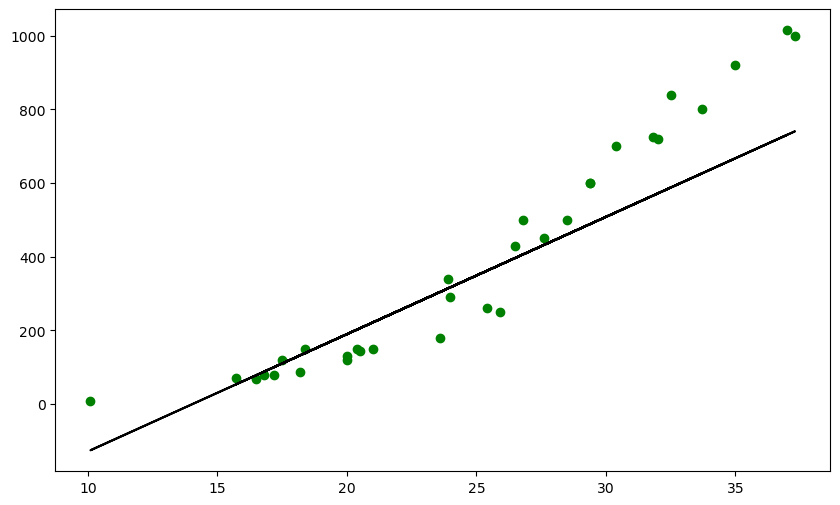

In [20]:
y_pred = regr.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color ='g')
plt.plot(X_test, y_pred, color ='k')
plt.show()

## Su turno


1. Bosquejar en la misma gráfica el diagrama de dispersión de (Lenght1,Weight) en color verde y el diagrama de dispersión para (Width, Weight) en color azul. Para esto sólo se requiere añadir al código dos líneas seguidas del tipo: plt.scatter(data=df, x=___, y=___, color= ___)

2. ¿Cuál modelo tendrá una pendiente mayor?
3. Entrenar un modelo de regresión lineal para predecir el peso (Weight), usando la variable Width.
4. ¿Cuál tiene mayor Coeficiente de determinación? ¿por qué cree que esto ocurre?

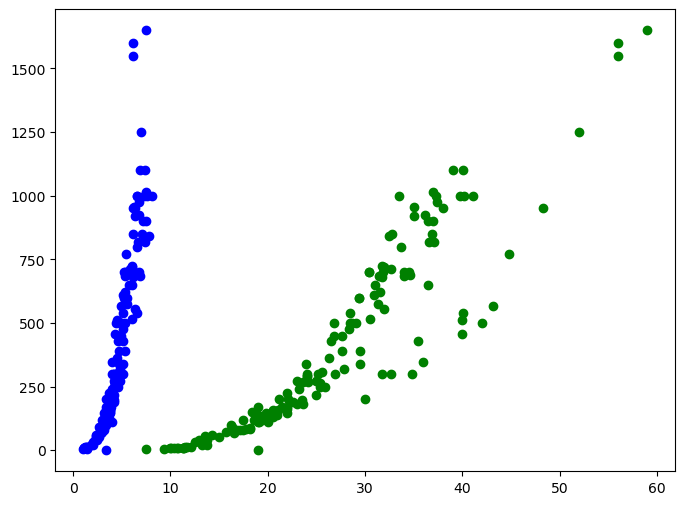

In [21]:
#Graficar diagrama de dispersión para Length1 vs Weight
plt.figure(figsize = [8, 6]) #Establecemos el tamaño de la figura
plt.scatter(data=df, x='Length1', y='Weight', color= "green") 
plt.scatter(data=df, x='Width', y='Weight', color= "blue") 


### Pregunta 2
#### ¿Cuál modelo tendrá una pendiente mayor?

la pendiente para los datos de Width y Weight tendrá una mayor pendiente

### Pregunta 3
Entrenar un modelo de regresión lineal para predecir el peso (Weight), usando la variable Width.

In [28]:
X2 = np.array(df['Width']).reshape(-1, 1)
y = df['Weight']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2)

In [33]:
regre2 = LinearRegression()

regre2.fit(X_train2, y_tbrain2)
y_pred2 = regre2.predict(X_test2)

print("score = ", r2_score(y_test2, y_pred2))
print("MSE = ", mean_squared_error(y_test2, y_pred2))

score =  0.767013265627677
MSE =  16976.79285704747


In [38]:
print('slope:', regre2.coef_[0])
print('intercept:', regre2.intercept_)

slope: 191.28392801944673
intercept: -441.33625595503935


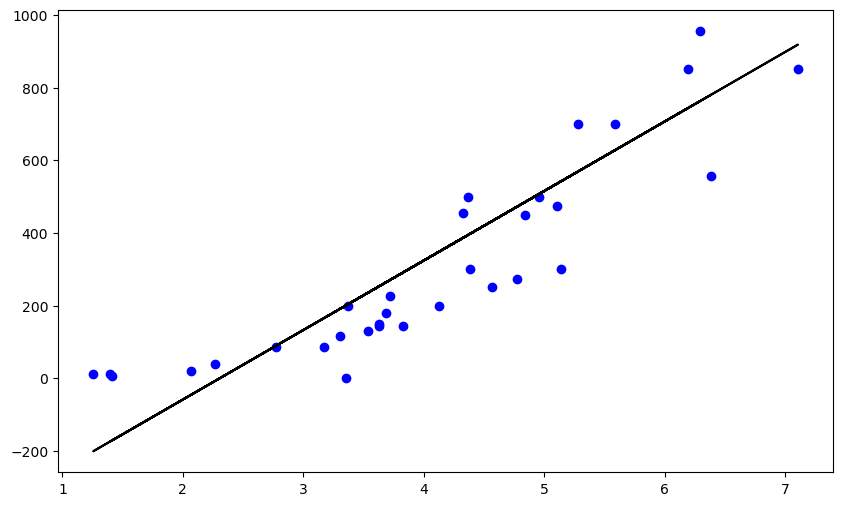

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X_test2, y_test2, color ='b')
plt.plot(X_test2, y_pred2, color ='k')
plt.show()

### ¿Cuál tiene mayor Coeficiente de determinación? ¿por qué cree que esto ocurre?


el primer modelo que usa la variable "lenght1" para predecir el "weight" nos da un mayor R2 que el segundo modelo que usamos la variable "width" para predecir el "weight", esto quiere decir que la variable "lenght1" es un mejor predictor para "weight" 

## Las dos formas de hacer regresión lineal

En clase vimos que hay dos formas de lograr un modelo de regresión lineal. La primera es calculando el vector de parámetros que minimice la función de error, mediante derivadas. Vimos una fórmula para dicho mínimo. Éste es el método de usa el algoritmo *LinearRegression* de SKLearn.

Sin embargo, vimos también que hay otra forma de encontrar dicho mínimo y es mediante el algoritmo del decenso de gradiente. (¿Recuerda la ventaja o desventaja de cada uno?, si o las recuerda, será mejor investigarlas).

Vamos a considerar un conjunto de datos muy simple: las cuatro esquinas de un cuadrado.

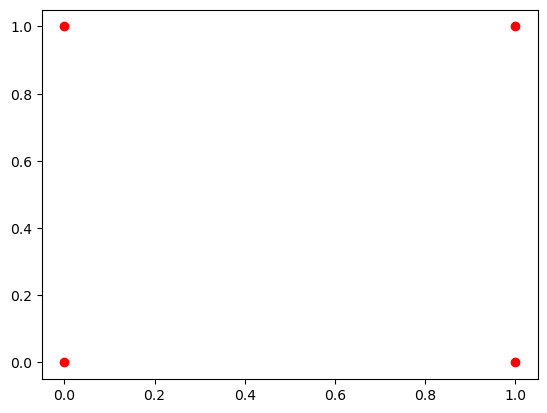

In [43]:
x = np.array([0, 0, 1, 1])
y = np.array([0, 1, 0, 1])
plt.scatter(x, y, color = 'red')
X = x.reshape(-1, 1)


Podemos aplicar el algoritmo *LinearRegression* para intentar modelar linealmente este conunto de datos.

**Ojo:** Tenga presentes dos cosas.
-  Recuerde que LinearRegression recibe como datos de entrada un arreglo 2-dimensional, por lo cual debe redimensionar sus datos.
- Al ser tan pocos datos, no separaremos en *train* y *test*. Símplemente entrenaremos el modelo usando *X*, *y* en lugar de *X_train*, *y_train*.


### Ejercicio

4. De acuerdo a lo visto en clase, cuál intuye que sería la recta que arrojaría este algoritmo como modelo de regresión lineal? ¿Por qué?
5. Use *LinearRegression* de SKLearn para calcular dicho modelo. Calcule su coeficiente de determinación.
6. ¿Observa algo particular en el coeficiente de determinación? Explique ka razón de dicho valor.

4) En principio diría que una constante en y=0.5 dado que esos puntos no son una función y pensaria que si se hace el ajuste de curva la constante en 0.5 es el promedio exacto de cada punto a la recta

In [50]:
# 5)
regr3 = LinearRegression()
regr3.fit(X,y)
y_pred3 = regr3.predict(X)

print('score =', r2_score(y,y_pred3) )
print('MSE =', mean_squared_error(y, y_pred3))

score = 0.0
MSE = 0.25


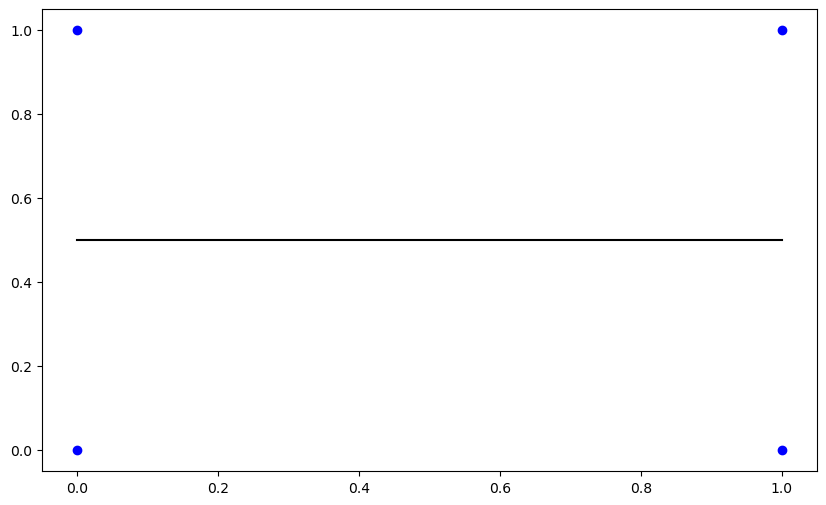

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred3, color ='k')
plt.show()

6) si el score es 0 y como podemos comprobar en la gráfica este modelo no le importan mis datos en X, lo que quiere decir que mi variable X no me sirve para predecir mi variable y, y es independiente de X. 

### Ejercicio: Ahora con decenso de gradiente

Podemos entrenar un modelo de regresión lineal utilizando el decenso de gradiente. Existe un algoritmo en SKLearn que hace eso: *SGDRegressor*. Investigue un poco sobre este algoritmo y sus parámetros.

7. Entrene un algoritmo de regresión lineal usando SGDRegressor. En dicho entrenamiento, utilice en primer lugar los parámetros:
- learning_rate='constant'
- eta0=0.01, max_iter=10000
- tol=1e-3
- random_state=0

8. Compare el resultado con el de *LinearRegressor*. ¿Cuál dio mejor resultado? ¿Por qué?¿Convendría siempre utilizar el algoritmo que dió mejor resultado?

9. Experimente con diferentes valores de los parámetros de SGDRegressor. Qué concluye acerca del efecto de variar dichos parámetros?

10. Escriba algunas conclusiones generales del ejercicio.

In [51]:
from sklearn.linear_model import SGDRegressor

In [62]:
X_GD = np.array(df['Length1']).reshape(-1, 1)
y_GD = df['Weight']

XGD_train, XGD_test, yGD_train, yGD_test = train_test_split(X_GD, y_GD, test_size = 0.2)

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64